# Metaclasses

_"Don't try this at work, unless you have excluded all alternatives and you really know what you are doing and you have talked to at least one sane person."_

_"Metaclasses are deeper magic than 99% of users should ever worry about. If you wonder whether you need them, you don't (the people who actually need them know with certainty that they need them, and don't need an explanation about why). Tim Peters (c.l.p post 2002-12-22)"_

De la misma manera que una clase funciona como una plantilla para la creación de objetos, una metaclase funciona como una plantilla para la creación de clases. Las metaclases a veces se denominan fábricas de clase.

> source: https://realpython.com/python-metaclasses/

In [1]:
class Foo:
    def __init__(self):
        self.attr = 100


x = Foo()
x.attr

100

In [2]:
y = Foo()
y.attr

100

In [3]:
z = Foo()
z.attr

100

In [8]:
type(type)

type

In [9]:
class Meta(type):
    def __init__(cls, name, bases, dct):
        cls.attr = 100

In [10]:
class X(metaclass=Meta):
    pass

In [11]:
X.attr

100

In [12]:
class Y(metaclass=Meta):
    pass


Y.attr

100

In [13]:
class Z(metaclass=Meta):
    pass


Z.attr

100

### Otras formas

In [14]:
# simple inheritance

class Base:
    attr = 100


class X(Base):
    pass


class Y(Base):
    pass


class Z(Base):
    pass


print(X.attr)

print(Y.attr)

print(Z.attr)

100
100
100


In [15]:
# class decorator

def decorator(cls):
    class NewClass(cls):
        attr = 100
    return NewClass

@decorator
class X:
    pass

@decorator
class Y:
    pass

@decorator
class Z:
    pass


print(X.attr)

print(Y.attr)

print(Z.attr)

100
100
100


In [17]:
hasattr("asdas", "jaja")

False

In [33]:
from functools import wraps

def trace_func(func):
    
    if hasattr(func, "tracing"):
        return func
    
    @wraps(func)
    def wrapper(*args, **kwargs):
        result = None
        try:
            result = func(*args, **kwargs)
            return result
        except Exception as e:
            result = e
            raise
            
        finally:
            print(f"{func.__name__}({args},{kwargs}) -> {result!r}")
            
    wrapper.tracing = True
    return wrapper

In [34]:
class TraceDict(dict):
    @trace_func
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
    @trace_func
    def __setitem__(self, *args, **kwargs):
        return super().__setitem__(*args, **kwargs)
    

In [35]:
dd = TraceDict([("hola", 1)])

__init__(({'hola': 1}, [('hola', 1)]),{}) -> None


In [36]:
dd["hello"] = 1234

__setitem__(({'hola': 1, 'hello': 1234}, 'hello', 1234),{}) -> None


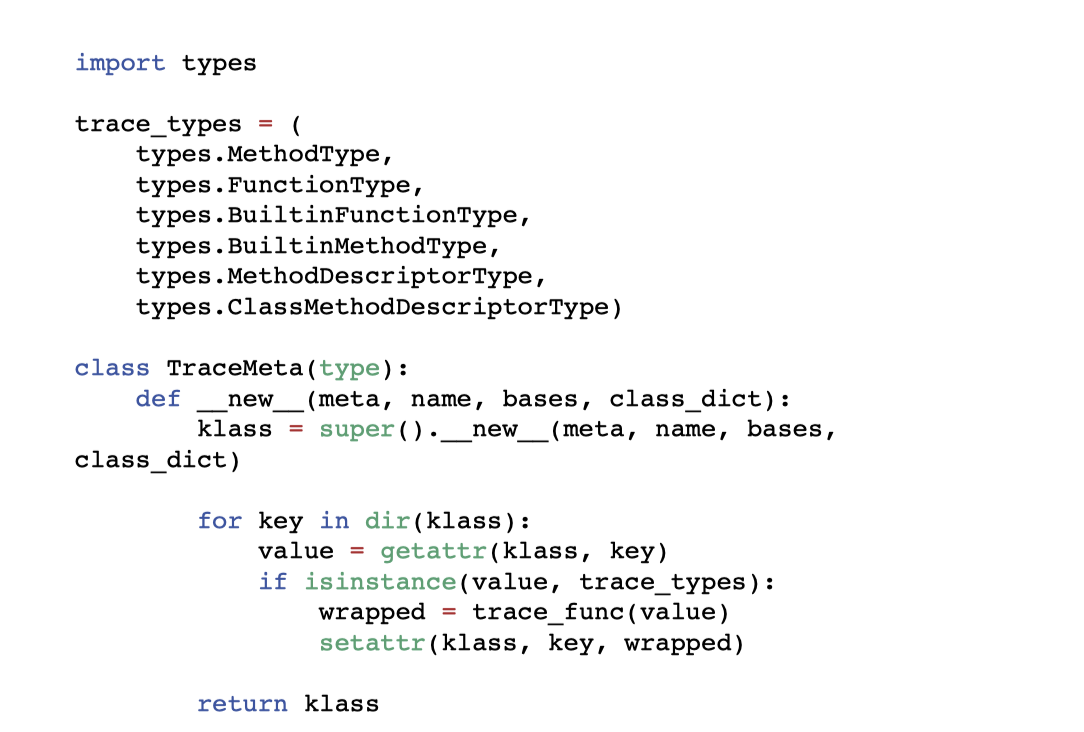

In [ ]:
def class_deco(clase):
    for key in dir(clase):
        
        value = getattr(clase, key)
        if isinstance(value, unodelostypes):
            wrapper = trace_func(value)
            setattr(clase, key, value)
    return clase

### Más información:

* https://stackoverflow.com/questions/392160/what-are-some-concrete-use-cases-for-metaclasses
* https://python-3-patterns-idioms-test.readthedocs.io/en/latest/Metaprogramming.html
* https://realpython.com/python-metaclasses/
* https://stackabuse.com/python-metaclasses-and-metaprogramming/
* https://medium.com/profil-software-blog/classes-with-class-metaclasses-in-python-3e637602268d

Ricardo Ander-Egg Aguilar

* 🖥: https://ricardoanderegg.com/
* 🐦: https://twitter.com/ricardoanderegg
* 👨🏻‍🎓: https://www.linkedin.com/in/ricardoanderegg/